In [1]:
import os

# Move into the 'Airbnb Data' subfolder
os.chdir(r'C:\Users\samru\Desktop\Portfolio\Maven\Pyython\Airbnb Data')

# List files to confirm
os.listdir()


['Listings.csv',
 'Listings_data_dictionary.csv',
 'README.MD',
 'Reviews.csv',
 'Reviews_data_dictionary.csv']

In [2]:
import pandas as pd

# Try reading with a Windows-friendly encoding
listings = pd.read_csv('Listings.csv', encoding='latin1')

# View first few rows
listings.head()


C:\Users\samru\AppData\Local\Temp\ipykernel_25968\3559992286.py:4: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv('Listings.csv', encoding='latin1')


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')

In [4]:
# Convert host_since to datetime
listings['host_since'] = pd.to_datetime(listings['host_since'], errors='coerce')

# Ensure price is string, remove $ and commas, convert to float
listings['price'] = listings['price'].astype(str).str.replace('[\$,]', '', regex=True)
listings['price'] = pd.to_numeric(listings['price'], errors='coerce')

# Filter to Paris listings and select columns
paris_listings = listings[listings['city'] == 'Paris'][['host_since', 'neighbourhood', 'city', 'accommodates', 'price']].copy()

print(paris_listings.head())

  host_since      neighbourhood   city  accommodates  price
0 2011-12-03  Buttes-Montmartre  Paris             2     53
1 2013-11-29  Buttes-Montmartre  Paris             2    120
2 2014-07-31             Elysee  Paris             2     89
3 2013-12-17          Vaugirard  Paris             2     58
4 2014-12-14              Passy  Paris             2     60


In [5]:
paris_listings.isnull().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [6]:
paris_listings = paris_listings.dropna(subset=['host_since'])

In [7]:
paris_listings.isnull().sum()

host_since       0
neighbourhood    0
city             0
accommodates     0
price            0
dtype: int64

In [8]:
print(paris_listings[['accommodates', 'price']].describe())

       accommodates         price
count  64657.000000  64657.000000
mean       3.037877    113.104614
std        1.588382    214.479626
min        0.000000      0.000000
25%        2.000000     59.000000
50%        2.000000     80.000000
75%        4.000000    120.000000
max       16.000000  12000.000000


In [9]:
paris_listings_neighbourhood = paris_listings.groupby('neighbourhood')['price'].mean().sort_values()
print(paris_listings_neighbourhood)

neighbourhood
Menilmontant            74.911561
Buttes-Chaumont         82.690182
Buttes-Montmartre       87.222069
Reuilly                 89.058402
Popincourt              90.518955
Gobelins                98.110184
Observatoire           101.873591
Batignolles-Monceau    102.615616
Enclos-St-Laurent      102.988752
Vaugirard              106.842073
Opera                  119.050713
Pantheon               122.696120
Temple                 138.429300
Hotel-de-Ville         144.515228
Bourse                 149.496801
Luxembourg             155.638639
Palais-Bourbon         156.891525
Passy                  161.190476
Louvre                 175.379972
Elysee                 210.536765
Name: price, dtype: float64


In [10]:
most_expensive_neighbourhood = paris_listings_neighbourhood.idxmax()
print("Most expensive neighborhood:", most_expensive_neighbourhood)

Most expensive neighborhood: Elysee


In [11]:
paris_listings_accommodations = paris_listings[paris_listings['neighbourhood'] == most_expensive_neighbourhood] \
    .groupby('accommodates')['price'].mean().sort_values()

print(paris_listings_accommodations)

accommodates
0       0.000000
1      79.522222
3     152.828767
2     155.103352
4     212.096070
5     328.817073
6     355.508571
8     405.518519
7     411.538462
9     440.272727
10    500.857143
12    529.625000
16    800.000000
11    805.000000
13    842.500000
14    971.000000
Name: price, dtype: float64


In [12]:
paris_listings['host_since_year'] = paris_listings['host_since'].dt.year

In [13]:
paris_listings_over_time = paris_listings.groupby('host_since_year').agg(
    average_price=('price', 'mean'),
    new_hosts_count=('host_since_year', 'count')
).reset_index()

print(paris_listings_over_time)

    host_since_year  average_price  new_hosts_count
0              2008      77.750000                4
1              2009     159.641509              106
2              2010     125.031250              416
3              2011     124.828230             1339
4              2012     111.578615             4592
5              2013     107.096414             8142
6              2014     100.253800            10922
7              2015     103.646250            12147
8              2016     114.159847             8871
9              2017     108.658888             4585
10             2018     138.209362             4294
11             2019     129.757113             5694
12             2020     141.456038             3412
13             2021      93.488722              133


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Improve style
sns.set(style="whitegrid")


In [1]:
plt.figure(figsize=(10, 8))
paris_listings_neighbourhood.plot(kind='barh', color='skyblue')
plt.title('Average Airbnb Price by Neighborhood in Paris')
plt.xlabel('Average Price (€)')
plt.ylabel('Neighborhood')
plt.gca().invert_yaxis()  # Highest price on top
plt.show()
plt.savefig('avg_price_by_neighbourhood.png', dpi=300, bbox_inches='tight')
plt.show()


NameError: name 'plt' is not defined

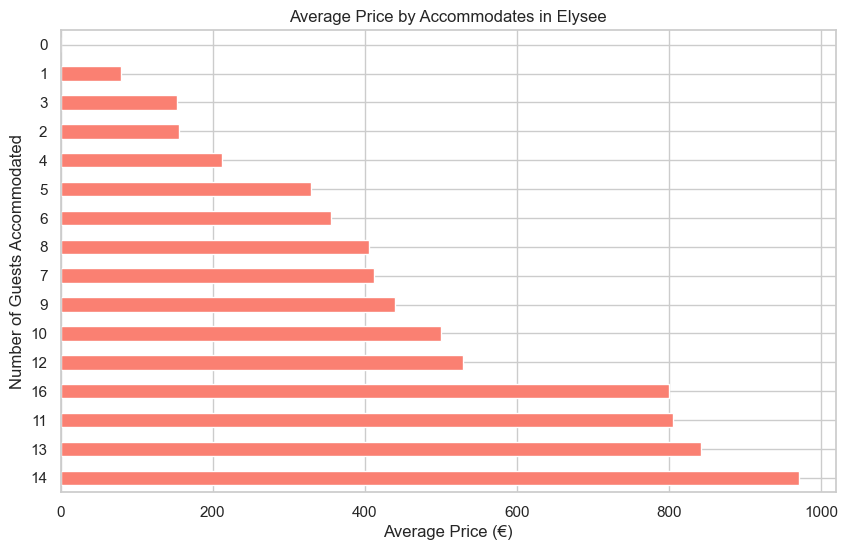

In [16]:
plt.figure(figsize=(10, 6))
paris_listings_accommodations.plot(kind='barh', color='salmon')
plt.title(f'Average Price by Accommodates in {most_expensive_neighbourhood}')
plt.xlabel('Average Price (€)')
plt.ylabel('Number of Guests Accommodated')
plt.gca().invert_yaxis()
plt.show()

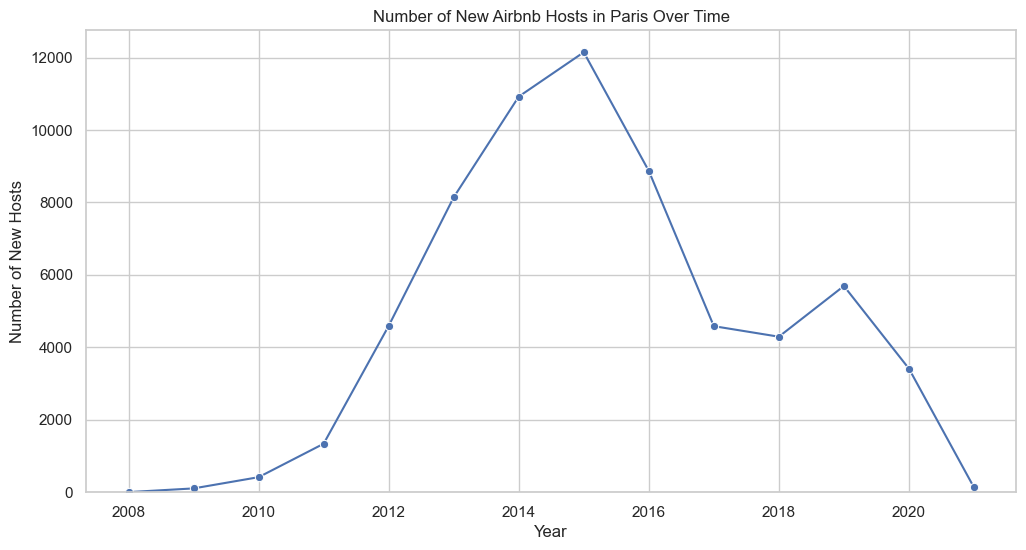

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=paris_listings_over_time, x='host_since_year', y='new_hosts_count', marker='o')
plt.title('Number of New Airbnb Hosts in Paris Over Time')
plt.xlabel('Year')
plt.ylabel('Number of New Hosts')
plt.ylim(0)  # y-axis starts at 0
plt.show()

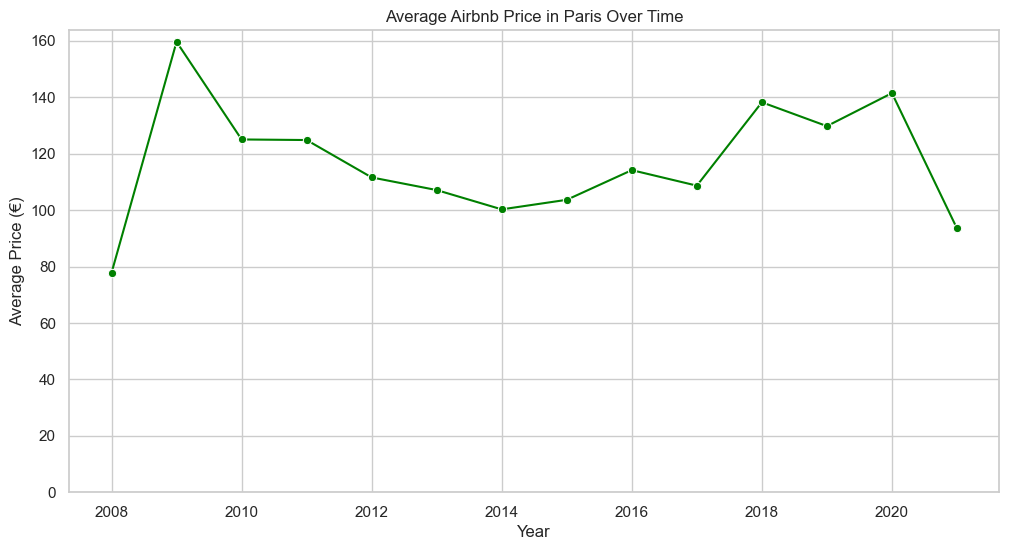

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=paris_listings_over_time, x='host_since_year', y='average_price', marker='o', color='green')
plt.title('Average Airbnb Price in Paris Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price (€)')
plt.ylim(0)
plt.show()

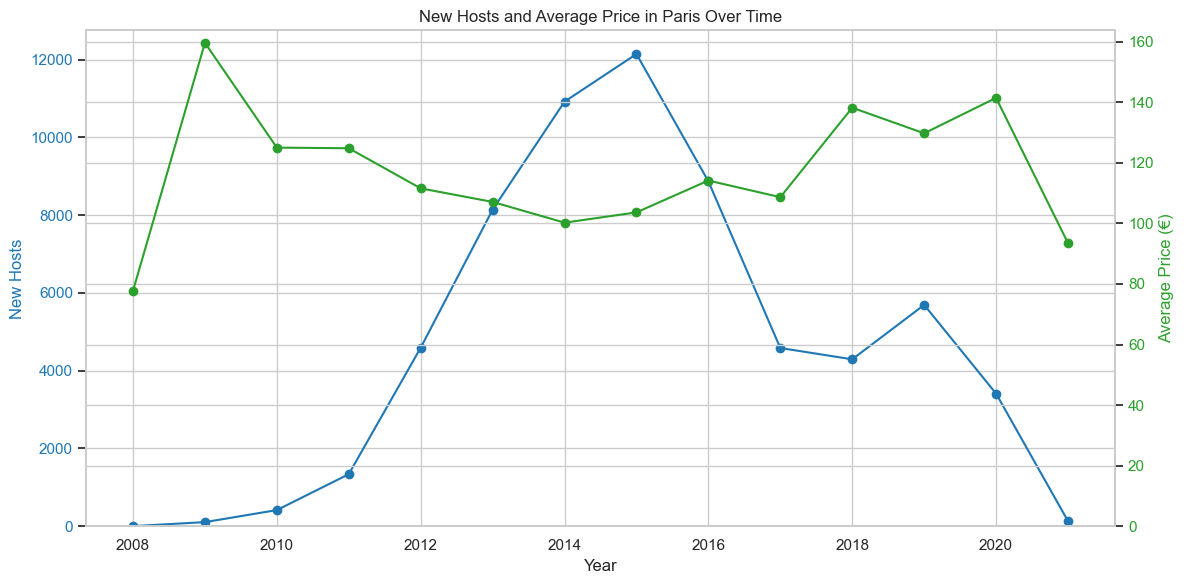

In [19]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('New Hosts', color=color)
ax1.plot(paris_listings_over_time['host_since_year'], paris_listings_over_time['new_hosts_count'], marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Average Price (€)', color=color)
ax2.plot(paris_listings_over_time['host_since_year'], paris_listings_over_time['average_price'], marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0)

plt.title('New Hosts and Average Price in Paris Over Time')
fig.tight_layout()
plt.show()

In [20]:
# Group by neighborhood and calculate mean price
avg_price_by_neighbourhood = paris_listings.groupby('neighbourhood')['price'].mean()

# Find the neighborhood with the highest average price
most_expensive_neighbourhood = avg_price_by_neighbourhood.idxmax()
highest_avg_price = avg_price_by_neighbourhood.max()

print(f"The neighborhood with the highest average Airbnb price is: {most_expensive_neighbourhood}")
print(f"Highest average price: €{highest_avg_price:.2f}")

The neighborhood with the highest average Airbnb price is: Elysee
Highest average price: €210.54


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(10, 8))
paris_listings_neighbourhood.plot(kind='barh', color='skyblue')

plt.title('Average Airbnb Price by Neighborhood in Paris')
plt.xlabel('Average Price (€)')
plt.ylabel('Neighborhood')

plt.tight_layout()
plt.savefig('images/avg_price_by_neighbourhood.png', dpi=300, bbox_inches='tight')
plt.show()


OSError: 'seaborn-v0_8-whitegrid' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style (compatible version)
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(10, 8))
paris_listings_neighbourhood.plot(kind='barh', color='skyblue')

plt.title('Average Airbnb Price by Neighborhood in Paris')
plt.xlabel('Average Price (€)')
plt.ylabel('Neighborhood')

plt.tight_layout()
plt.savefig('images/avg_price_by_neighbourhood.png', dpi=300, bbox_inches='tight')
plt.show()


NameError: name 'paris_listings_neighbourhood' is not defined

<Figure size 1000x800 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create folder for saving images (if it doesn't already exist)
os.makedirs("images", exist_ok=True)

# Set style
plt.style.use('seaborn-whitegrid')

# Create the figure and plot
plt.figure(figsize=(10, 8))
plt.barh(paris_listings_neighbourhood['neighbourhood'], paris_listings_neighbourhood['price'], color='skyblue')

# Add labels and title
plt.title('Average Airbnb Price by Neighborhood in Paris', fontsize=14, fontweight='bold')
plt.xlabel('Average Price (€)', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)

# Make layout nice and save the image
plt.tight_layout()
plt.savefig('images/avg_price_by_neighbourhood.png', dpi=300, bbox_inches='tight')

# Display the chart in Jupyter
plt.show()


NameError: name 'paris_listings_neighbourhood' is not defined

<Figure size 1000x800 with 0 Axes>

In [5]:
# Group Paris listings by neighbourhood and calculate mean price
paris_listings_neighbourhood = (
    paris_listings.groupby('neighbourhood', as_index=False)['price']
    .mean()
    .sort_values(by='price', ascending=True)
)

# Preview the result
paris_listings_neighbourhood.head()


NameError: name 'paris_listings' is not defined

In [6]:
import pandas as pd

# Load Listings.csv (use latin1 encoding to avoid decoding errors)
listings = pd.read_csv('Listings.csv', encoding='latin1', low_memory=False)

# Check structure
print(listings.shape)
listings.head()


(279712, 33)


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [7]:
import pandas as pd

# Load Listings.csv (use latin1 encoding to avoid decoding errors)
listings = pd.read_csv('Listings.csv', encoding='latin1', low_memory=False)

# Check structure
print(listings.shape)
listings.head()


(279712, 33)


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [8]:
# Keep only Paris listings
paris_listings = listings[listings['city'].str.lower() == 'paris']

# Keep only relevant columns
paris_listings = paris_listings[['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

# Check the shape and sample
print(paris_listings.shape)
paris_listings.head()


(64690, 5)


,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [9]:
paris_listings = paris_listings.dropna(subset=['price', 'neighbourhood'])


In [10]:
paris_listings_neighbourhood = (
    paris_listings.groupby('neighbourhood', as_index=False)['price']
    .mean()
    .sort_values(by='price', ascending=True)
)

# Preview
paris_listings_neighbourhood.head()


,neighbourhood,price
10,Menilmontant,74.942257
2,Buttes-Chaumont,82.690182
3,Buttes-Montmartre,87.209479
17,Reuilly,89.058402
16,Popincourt,90.559459


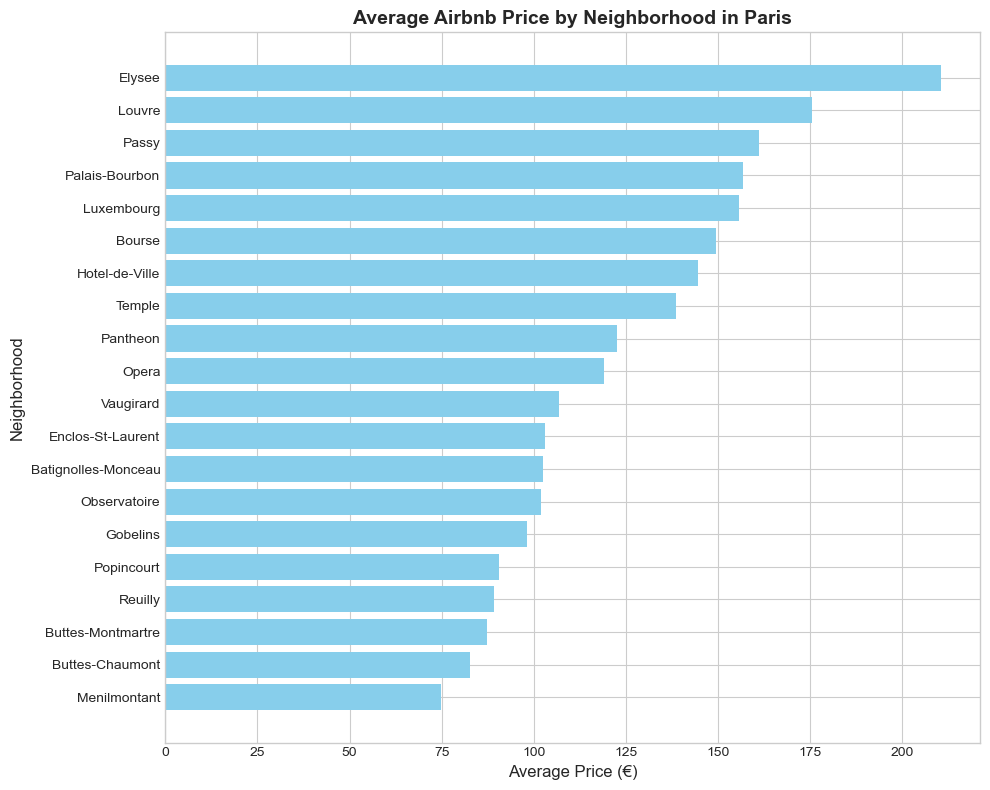

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Make sure the images folder exists
os.makedirs("images", exist_ok=True)

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 8))

plt.barh(paris_listings_neighbourhood['neighbourhood'], 
         paris_listings_neighbourhood['price'], 
         color='skyblue')

plt.title('Average Airbnb Price by Neighborhood in Paris', fontsize=14, fontweight='bold')
plt.xlabel('Average Price (€)', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)

plt.tight_layout()
plt.savefig('images/avg_price_by_neighbourhood.png', dpi=300, bbox_inches='tight')
plt.show()


In [12]:
import os
os.makedirs("images", exist_ok=True)


In [13]:
plt.savefig('images/filename.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

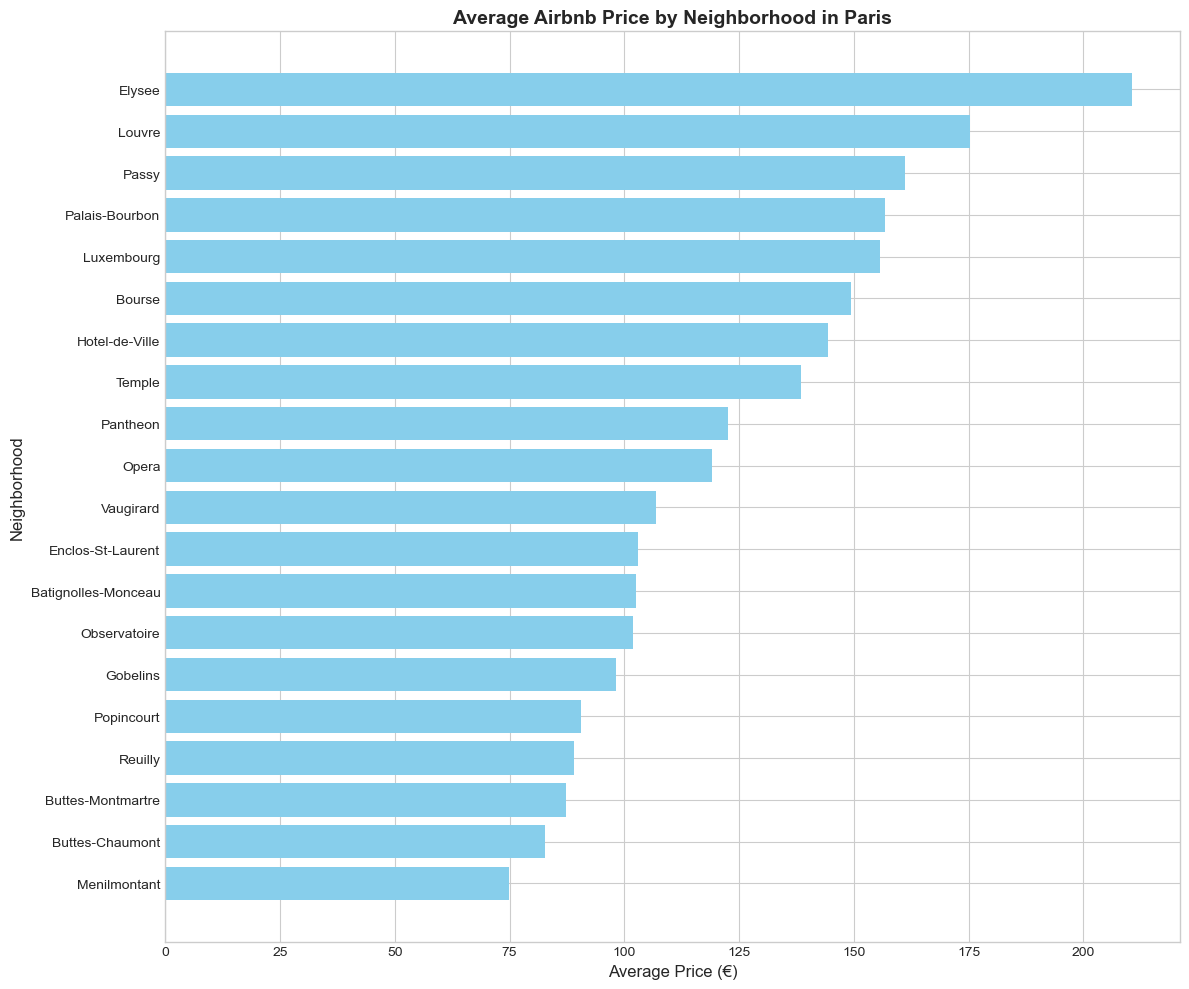

✅ Graph saved successfully as 'images/average_price_by_neighbourhood.png'


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Make sure folder exists
os.makedirs("images", exist_ok=True)

# Create figure
plt.figure(figsize=(12, 10))
plt.barh(paris_listings_neighbourhood['neighbourhood'], 
         paris_listings_neighbourhood['price'], 
         color='skyblue')

# Add labels & title
plt.title('Average Airbnb Price by Neighborhood in Paris', fontsize=14, fontweight='bold')
plt.xlabel('Average Price (€)', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)

# Adjust layout
plt.tight_layout()

# 💾 Save to PNG
plt.savefig('images/average_price_by_neighbourhood.png', dpi=300, bbox_inches='tight')

# Show in notebook
plt.show()

print("✅ Graph saved successfully as 'images/average_price_by_neighbourhood.png'")


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Make sure folder exists to store your graphs
os.makedirs("images", exist_ok=True)

# Optional: Set a nice visual style
plt.style.use('seaborn-whitegrid')


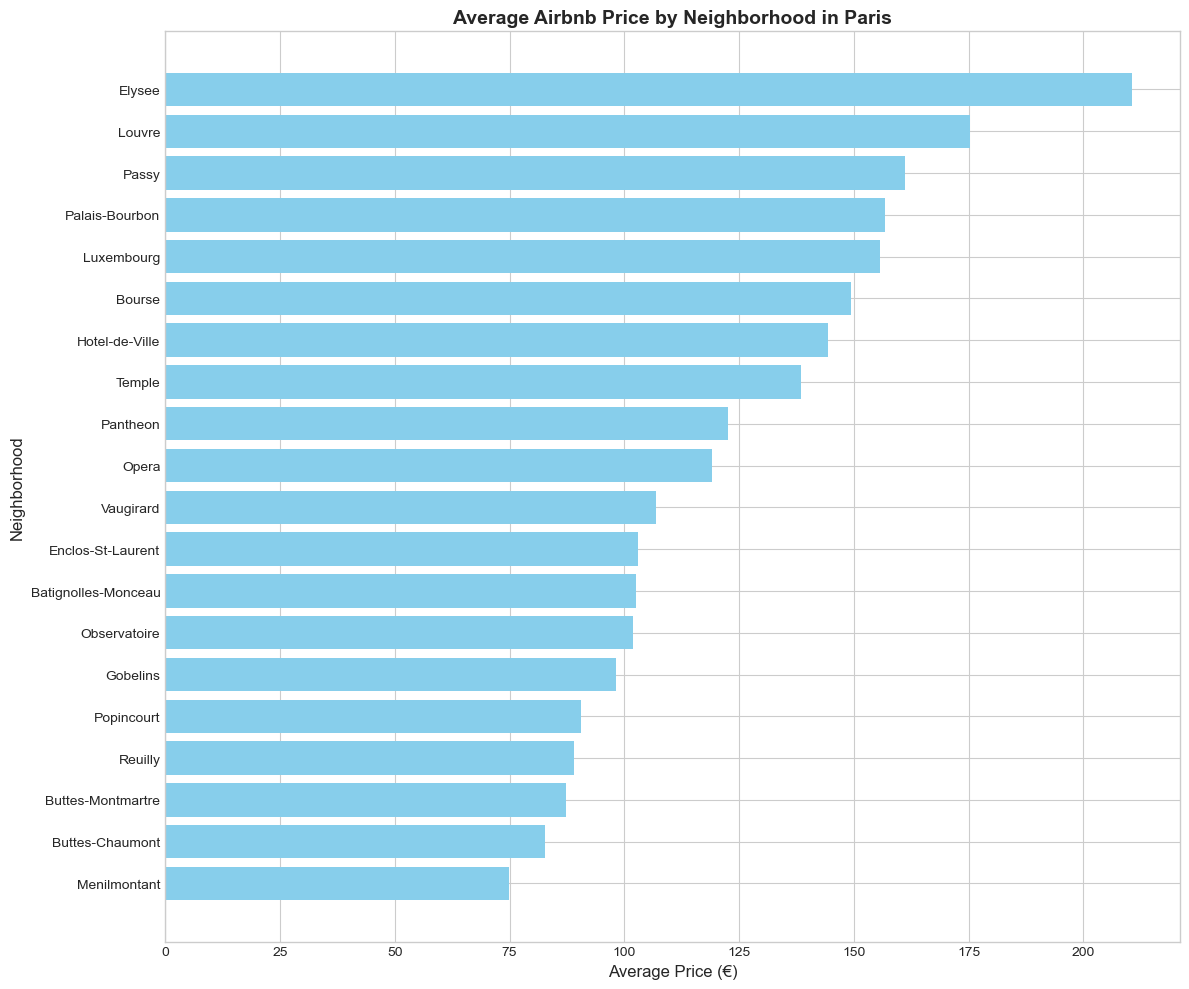

✅ Saved: average_price_by_neighbourhood.png


In [16]:
plt.figure(figsize=(12, 10))
plt.barh(paris_listings_neighbourhood['neighbourhood'],
         paris_listings_neighbourhood['price'],
         color='skyblue')

plt.title('Average Airbnb Price by Neighborhood in Paris', fontsize=14, fontweight='bold')
plt.xlabel('Average Price (€)', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)

plt.tight_layout()
plt.savefig('images/average_price_by_neighbourhood.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: average_price_by_neighbourhood.png")


In [17]:
plt.figure(figsize=(10, 6))
plt.barh(paris_listings_accommodations['accommodates'],
         paris_listings_accommodations['price'],
         color='lightcoral')

plt.title("Average Price by Number of Guests in Paris' Most Expensive Neighborhood", fontsize=14, fontweight='bold')
plt.xlabel('Average Price (€)', fontsize=12)
plt.ylabel('Number of Guests', fontsize=12)

plt.tight_layout()
plt.savefig('images/average_price_by_accommodates.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: average_price_by_accommodates.png")


NameError: name 'paris_listings_accommodations' is not defined

<Figure size 1000x600 with 0 Axes>

In [18]:
# Find neighborhood with highest average price
most_expensive_neighbourhood = paris_listings_neighbourhood.sort_values(by='price', ascending=False).iloc[0]['neighbourhood']
print("🏆 Most expensive neighborhood in Paris is:", most_expensive_neighbourhood)


🏆 Most expensive neighborhood in Paris is: Elysee


In [19]:
# Filter only listings from that neighborhood
most_expensive_df = paris_listings[paris_listings['neighbourhood'] == most_expensive_neighbourhood]

# Group by accommodates and calculate average price
paris_listings_accommodations = (
    most_expensive_df.groupby('accommodates', as_index=False)['price']
    .mean()
    .sort_values(by='accommodates', ascending=True)
)

# Display the result to confirm
paris_listings_accommodations.head()


,accommodates,price
0,0,0.000000
1,1,79.522222
2,2,155.103352
3,3,152.828767
4,4,212.096070


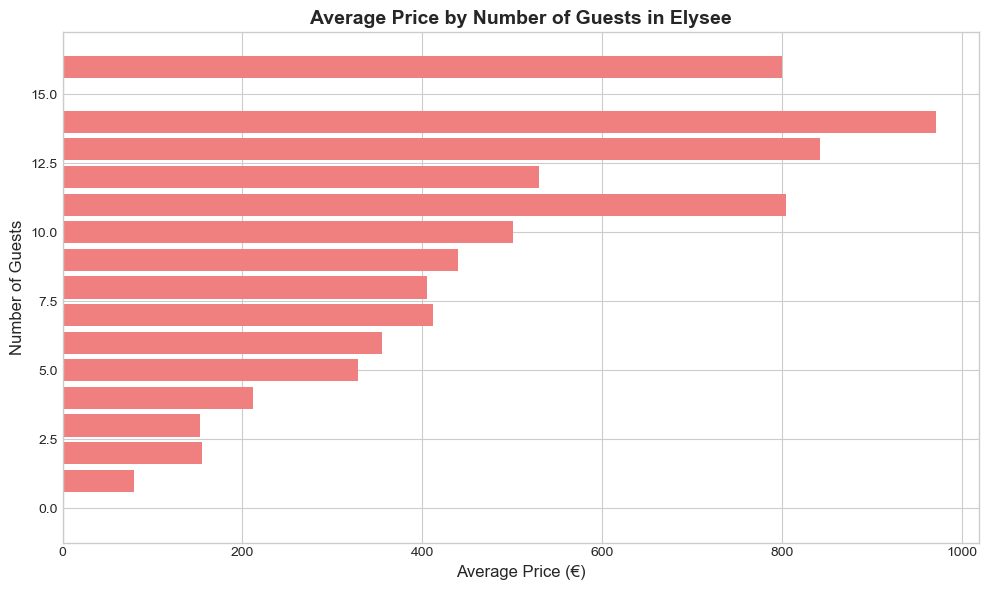

✅ Saved: average_price_by_accommodates.png


In [20]:
plt.figure(figsize=(10, 6))
plt.barh(paris_listings_accommodations['accommodates'],
         paris_listings_accommodations['price'],
         color='lightcoral')

plt.title(f"Average Price by Number of Guests in {most_expensive_neighbourhood}", fontsize=14, fontweight='bold')
plt.xlabel('Average Price (€)', fontsize=12)
plt.ylabel('Number of Guests', fontsize=12)

plt.tight_layout()
plt.savefig('images/average_price_by_accommodates.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: average_price_by_accommodates.png")


In [21]:
plt.figure(figsize=(10, 6))
plt.plot(paris_listings_over_time['host_since_year'], 
         paris_listings_over_time['new_hosts_count'], 
         marker='o', linestyle='-', color='green')

plt.title('Number of New Hosts Over Time in Paris', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of New Hosts', fontsize=12)
plt.ylim(bottom=0)
plt.grid(True)

plt.tight_layout()
plt.savefig('images/new_hosts_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: new_hosts_over_time.png")


NameError: name 'paris_listings_over_time' is not defined

<Figure size 1000x600 with 0 Axes>

In [22]:
paris_listings = listings[listings['city'] == 'Paris'][['host_since', 'neighbourhood', 'city', 'accommodates', 'price']].copy()

# Convert 'host_since' to datetime
paris_listings['host_since'] = pd.to_datetime(paris_listings['host_since'], errors='coerce')

# Drop rows where 'host_since' is NaT (missing dates)
paris_listings = paris_listings.dropna(subset=['host_since'])


In [23]:
paris_listings['host_since_year'] = paris_listings['host_since'].dt.year

paris_listings_over_time = paris_listings.groupby('host_since_year').agg(
    average_price=('price', 'mean'),
    new_hosts_count=('host_since_year', 'count')
).reset_index()


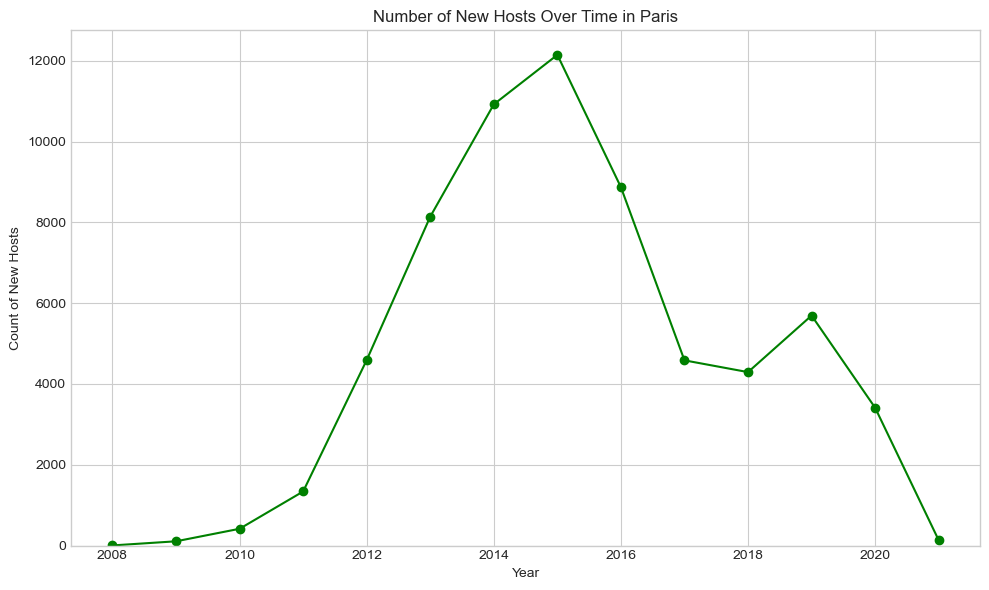

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(paris_listings_over_time['host_since_year'], 
         paris_listings_over_time['new_hosts_count'], 
         marker='o', linestyle='-', color='green')

plt.title('Number of New Hosts Over Time in Paris')
plt.xlabel('Year')
plt.ylabel('Count of New Hosts')
plt.ylim(bottom=0)
plt.grid(True)

plt.tight_layout()
plt.savefig('images/new_hosts_over_time.png', dpi=300, bbox_inches='tight')
plt.show()


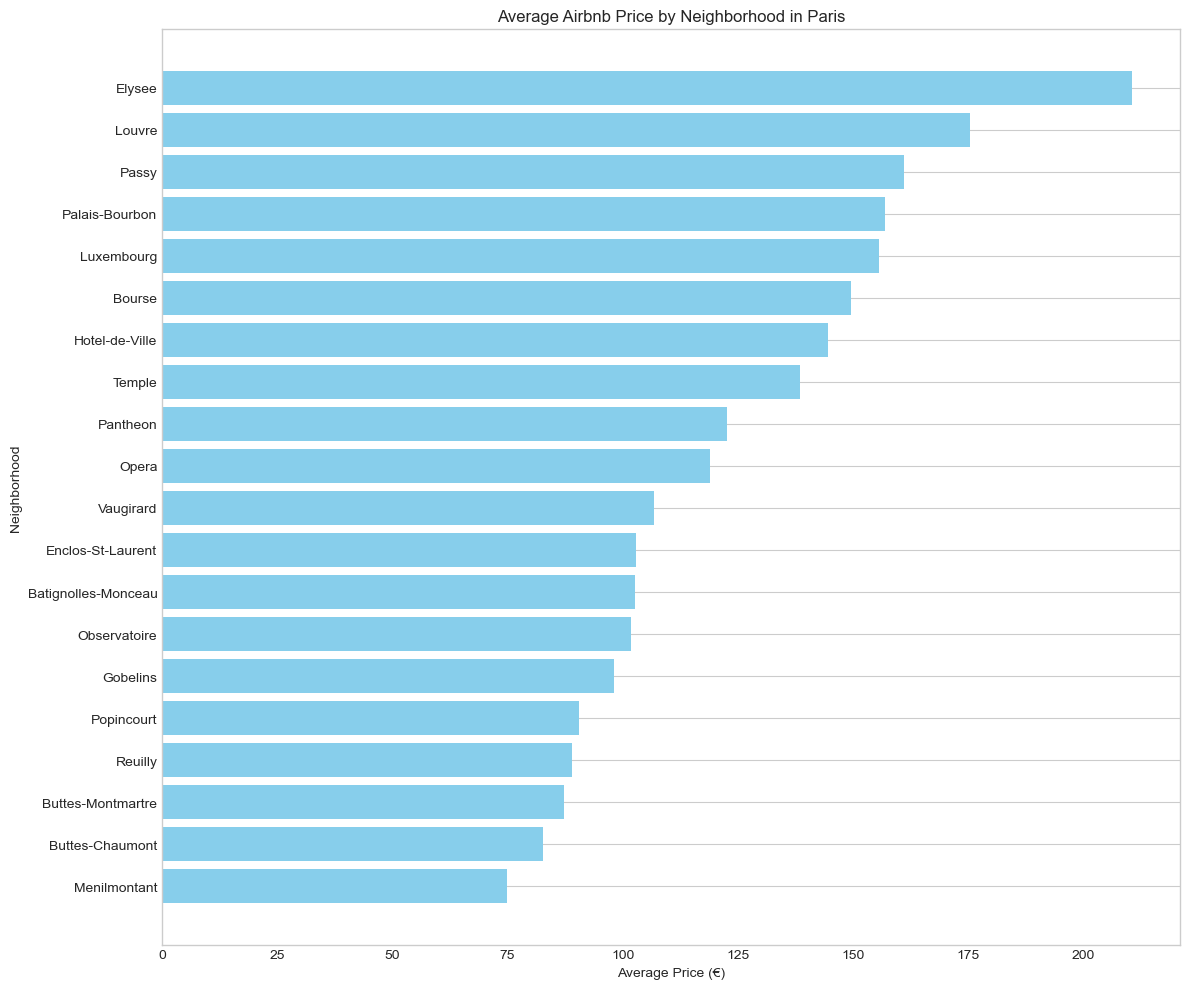

In [25]:
# Group Paris listings by 'neighbourhood' and calculate mean price
paris_listings_neighbourhood = (
    paris_listings.groupby('neighbourhood', as_index=False)['price']
    .mean()
    .sort_values(by='price', ascending=True)
)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.barh(paris_listings_neighbourhood['neighbourhood'], paris_listings_neighbourhood['price'], color='skyblue')
plt.title('Average Airbnb Price by Neighborhood in Paris')
plt.xlabel('Average Price (€)')
plt.ylabel('Neighborhood')
plt.grid(axis='x')

plt.tight_layout()
plt.savefig('images/avg_price_by_neighbourhood.png', dpi=300, bbox_inches='tight')
plt.show()


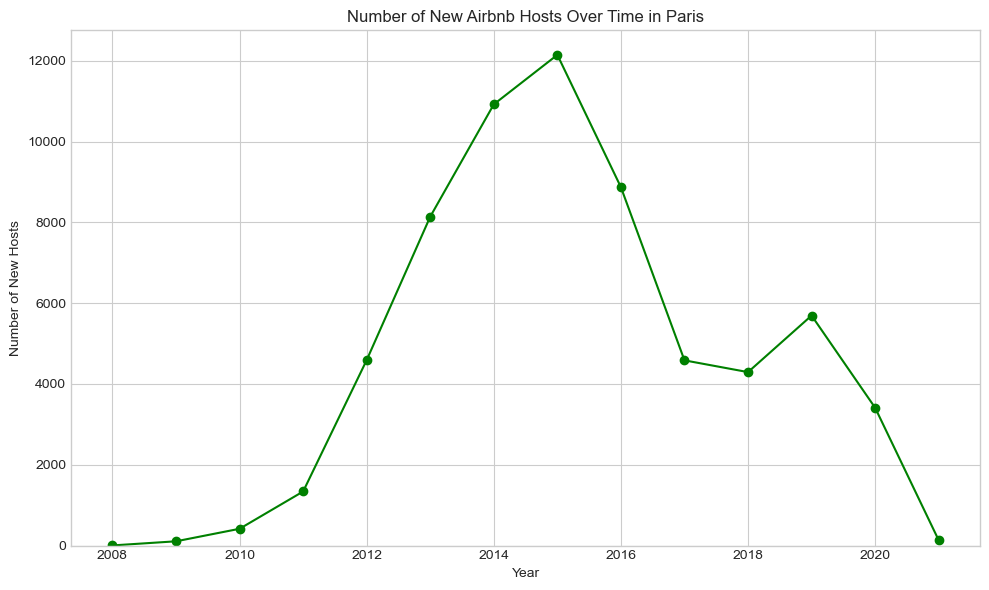

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(paris_listings_over_time['host_since_year'], 
         paris_listings_over_time['new_hosts_count'], 
         marker='o', linestyle='-', color='green')

plt.title('Number of New Airbnb Hosts Over Time in Paris')
plt.xlabel('Year')
plt.ylabel('Number of New Hosts')
plt.ylim(bottom=0)
plt.grid(True)

plt.tight_layout()
plt.savefig('images/new_hosts_over_time.png', dpi=300, bbox_inches='tight')
plt.show()


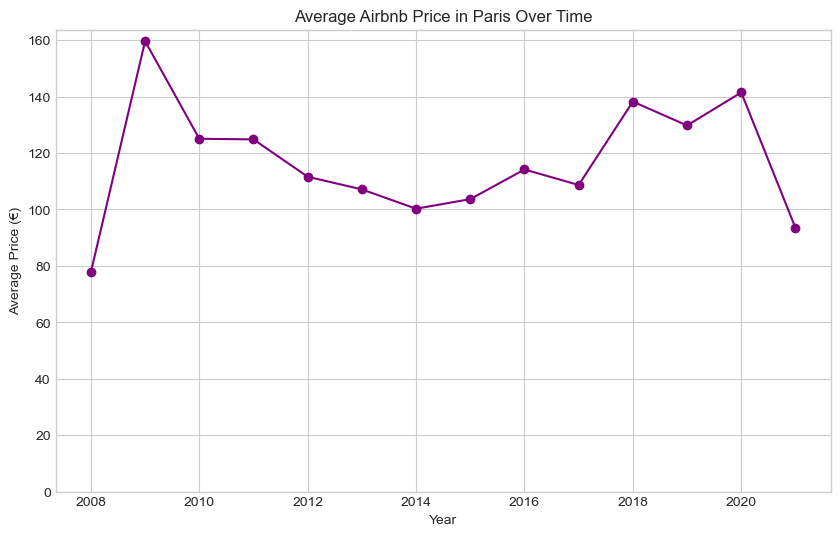

In [27]:
plt.figure(figsize=(10, 6))

plt.plot(paris_listings_over_time['host_since_year'], 
         paris_listings_over_time['average_price'], 
         marker='o', linestyle='-', color='purple')

plt.title('Average Airbnb Price in Paris Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price (€)')
plt.ylim(bottom=0)

# Save the figure
plt.savefig('images/avg_price_paris_over_time.png', dpi=300, bbox_inches='tight')
plt.show()


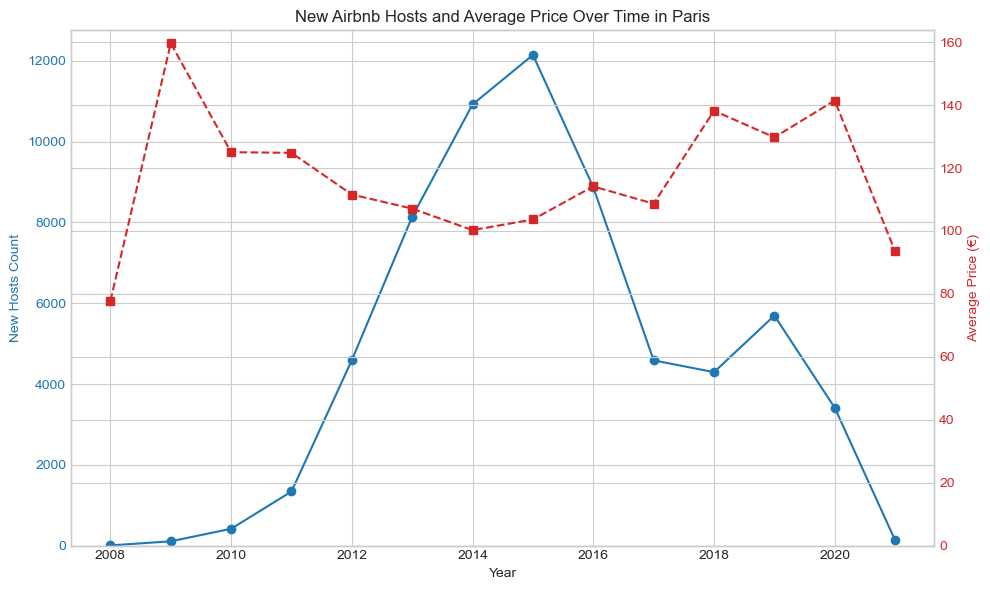

In [28]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# New hosts count on left y-axis
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('New Hosts Count', color=color)
ax1.plot(paris_listings_over_time['host_since_year'], 
         paris_listings_over_time['new_hosts_count'], 
         marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(bottom=0)

# Average price on right y-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Price (€)', color=color)
ax2.plot(paris_listings_over_time['host_since_year'], 
         paris_listings_over_time['average_price'], 
         marker='s', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(bottom=0)

plt.title('New Airbnb Hosts and Average Price Over Time in Paris')
fig.tight_layout()

# Save the figure
plt.savefig('images/dual_axis_new_hosts_avg_price.png', dpi=300, bbox_inches='tight')
plt.show()
